In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# load in the unemployment data
data = pd.read_csv('https://raw.git.generalassemb.ly/DSI-Misk-II/resource-datasets/master/unemployment_timeseries/seasonally-adjusted-quarterly-us.csv?token=AABEAJh3E9CVb2iT1o7RTBvbw3jx10taks5cRWecwA%3D%3D')

In [3]:
data.dropna(inplace=True)

In [4]:
data.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
169,1990Q2,5.333%
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%


In [5]:
data.columns = ['year_quarter', 'unemployment_rate']

In [6]:
data.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 2 columns):
year_quarter         174 non-null object
unemployment_rate    174 non-null object
dtypes: object(2)
memory usage: 4.1+ KB


In [8]:
# clean unemployment_rate column
data['unemployment_rate'] = data['unemployment_rate'].str.replace('%','').astype(float)/100

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 2 columns):
year_quarter         174 non-null object
unemployment_rate    174 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [10]:
# convert year_quarter to datatime index
data['date'] = pd.to_datetime(data['year_quarter']).dt.to_period('Q')
data.set_index('date', inplace=True, drop=True)


In [11]:
# make datatime index striaght forward ( try 2 )
data.index = pd.to_datetime(data['year_quarter'])

In [12]:
data.head()

,year_quarter,unemployment_rate
year_quarter,,
1948-01-01,1948Q1,0.03733
1948-04-01,1948Q2,0.03667
1948-07-01,1948Q3,0.03767
1948-10-01,1948Q4,0.03833
1949-01-01,1949Q1,0.04667


In [13]:
data.index

DatetimeIndex(['1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01', '1949-07-01', '1949-10-01',
               '1950-01-01', '1950-04-01',
               ...
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01'],
              dtype='datetime64[ns]', name='year_quarter', length=174, freq=None)

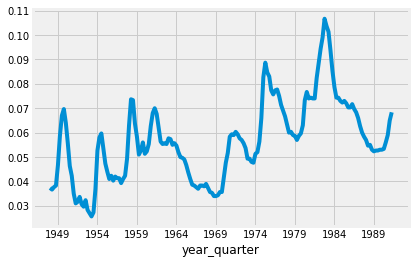

In [14]:
# plot the data
data['unemployment_rate'].plot();

In [15]:
# first look into autocorrelation 
urate = data['unemployment_rate']

In [16]:
# one lag = one quarter shift
urate.autocorr(1)

0.9648069187085503

In [17]:
[ urate.autocorr(k) for k in range(20)]

[1.0,
 0.9648069187085503,
 0.8845761825959341,
 0.7864722515546801,
 0.6915437416214167,
 0.6153518563834129,
 0.5607638212396637,
 0.5208758982607196,
 0.48991527733338547,
 0.4663424209703513,
 0.4434691993620028,
 0.4178318352441328,
 0.39321797923625845,
 0.37490436245716685,
 0.36294138330411596,
 0.3603214796832382,
 0.36243805672588886,
 0.35882729974151983,
 0.3436061679933478,
 0.31740037356699247]

In [18]:
# find autocorr with statmodels
from statsmodels.tsa.stattools import acf

In [19]:
acf(urate, nlags=20)

array([1.        , 0.95950578, 0.87513008, 0.77480906, 0.67860558,
       0.60302767, 0.54946953, 0.50980855, 0.47862666, 0.45530485,
       0.43290704, 0.40733564, 0.38242446, 0.36262662, 0.34831031,
       0.34311303, 0.34269765, 0.33602242, 0.31802897, 0.29043284,
       0.25556895])

In [20]:
# plot acf with statmodels
from statsmodels.graphics.tsaplots import plot_acf

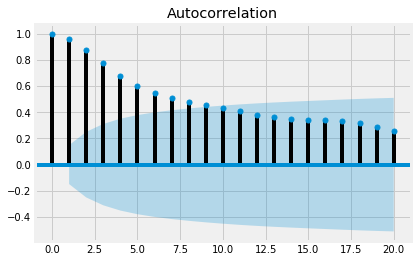

In [21]:
plot_acf(urate, lags=20);


In [22]:
# partial autocorrealtion function 
from statsmodels.graphics.tsaplots import plot_pacf

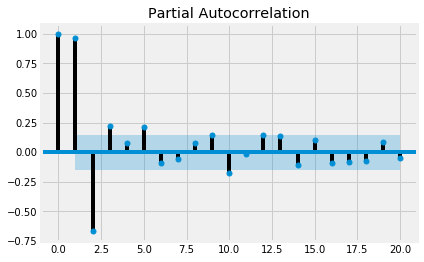

In [23]:
plot_pacf(urate, lags=20);


In [24]:
# to isolate the diffrent behaviors of time series, we want to decompose

from statsmodels.tsa.seasonal import seasonal_decompose

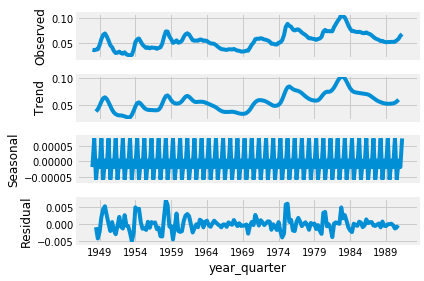

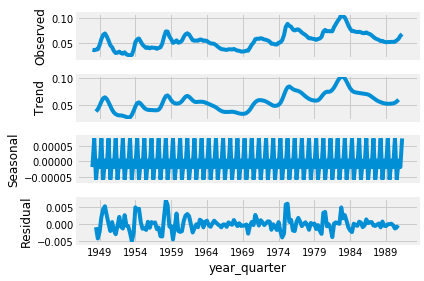

In [25]:
decomp_result = seasonal_decompose(urate)
decomp_result.plot()

# TODO: locate resource for freq in seasonal_decomp


In [26]:
urate.index

DatetimeIndex(['1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01', '1949-07-01', '1949-10-01',
               '1950-01-01', '1950-04-01',
               ...
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01'],
              dtype='datetime64[ns]', name='year_quarter', length=174, freq=None)

In [27]:
# differencing 
urate.head(), urate.diff().head()

(year_quarter
 1948-01-01    0.03733
 1948-04-01    0.03667
 1948-07-01    0.03767
 1948-10-01    0.03833
 1949-01-01    0.04667
 Name: unemployment_rate, dtype: float64, year_quarter
 1948-01-01        NaN
 1948-04-01   -0.00066
 1948-07-01    0.00100
 1948-10-01    0.00066
 1949-01-01    0.00834
 Name: unemployment_rate, dtype: float64)

In [28]:
# get the first diff to make the data steacenory
urate_first_diff = urate.diff().dropna()

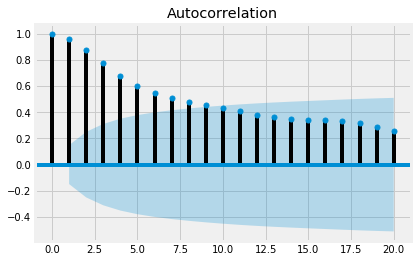

In [29]:
plot_acf(urate, lags=20);

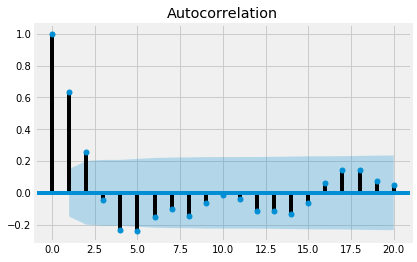

In [30]:
plot_acf(urate_first_diff, lags=20);

In [53]:
# modeling with AR, MA, ARIMA
from statsmodels.tsa.arima_model import ARIMA, ARMA, AR

In [68]:
model = ARIMA(urate, order=(2, 1, 1)) # specify p, d, q ( how many time look back, diff, )

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [74]:
model = model.fit(trend='nc')


In [78]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: ARIMA
=========================================================================
Model:                ARIMA               BIC:                 -1475.6278
Dependent Variable:   D.unemployment_rate Log-Likelihood:      748.12    
Date:                 2019-01-14 13:55    Scale:               1.0000    
No. Observations:     173                 Method:              css-mle   
Df Model:             3                   Sample:              04-01-1948
Df Residuals:         170                                      04-01-1991
Converged:            1.0000              S.D. of innovations: 0.003     
No. Iterations:       10.0000             HQIC:                -1483.124 
AIC:                  -1488.2410                                         
-------------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
ar.L1.D.unemployment_rate  1.4590   0.1399 10.4319 0.0000  1.1849  1.7332
ar.L2.D.unemployment_rate -0.6533   0.0733 -8.9175 0.0000 -0.7969 -0.5097
ma.L1.D.unemployment_rate -0.7657   0.1838 -4.1649 0.0000 -1.1261 -0.4054
------------------------------------------------------------------------------------
                  Real             Imaginary            Modulus            Frequency
------------------------------------------------------------------------------------
AR.1             1.1166              -0.5327             1.2372              -0.0709
AR.2             1.1166               0.5327             1.2372               0.0709
MA.1             1.3060               0.0000             1.3060               0.0000
=========================================================================

"""

In [75]:
# the prediction are not happy
model.predict(3, 5), urate[3:5]

(1948-10-01    0.000914
 1949-01-01    0.000493
 1949-04-01    0.005918
 Freq: QS-OCT, dtype: float64, year_quarter
 1948-10-01    0.03833
 1949-01-01    0.04667
 Name: unemployment_rate, dtype: float64)

In [99]:
model.predict(174, 177) # let's predict beyond (besure start point within range)

1991-07-01    0.001148
1991-10-01   -0.000501
1992-01-01   -0.001481
1992-04-01   -0.001834
Freq: QS-OCT, dtype: float64

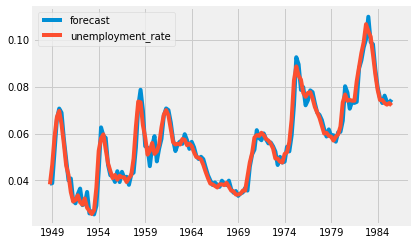

In [85]:
# let's predict and plot it out
model.plot_predict(3, 150);

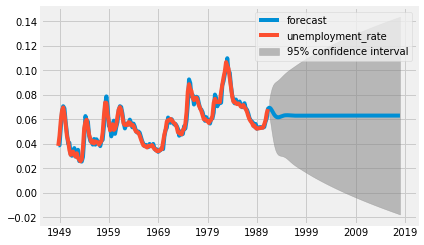

In [89]:
# let's go beyond the dates
model.plot_predict(3, 280);

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
len(urate)

174

In [106]:
len(model.predict(1, 150))

150

In [113]:
mean_squared_error(urate.diff().dropna(), model.predict())

1.0233667505172653e-05

In [112]:
urate.shape, urate.diff().shape, model.predict().shape

((174,), (174,), (173,))

In [115]:
r2_score(urate.diff().dropna(), model.predict())

0.4612622564086346

In [124]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [121]:
udiif = urate.diff().dropna()

In [125]:
auto_select = arma_order_select_ic(udiif, max_ar=4, max_ma=4, ic=['aic', 'bic'], trend='nc')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3

In [127]:
print(auto_select['aic'])

             0            1            2            3            4
0          NaN -1463.683398 -1477.230788 -1485.964123 -1484.057250
1 -1474.203004 -1479.313736 -1479.036052 -1483.993404 -1493.420817
2 -1482.688147 -1488.241009 -1486.882408 -1496.394255 -1496.828000
3 -1485.216146 -1487.303691 -1487.925067 -1486.009277 -1498.338744
4 -1486.345530 -1484.469190 -1486.131730 -1496.028219 -1500.079805


In [128]:
print(auto_select['bic'])

             0            1            2            3            4
0          NaN -1457.376815 -1467.770913 -1473.350957 -1468.290792
1 -1467.896420 -1469.853861 -1466.422886 -1468.226946 -1474.501068
2 -1473.228272 -1475.627843 -1471.115950 -1477.474506 -1474.754959
3 -1472.602979 -1471.537233 -1469.005317 -1463.936236 -1473.112412
4 -1470.579072 -1465.549440 -1464.058689 -1470.801887 -1471.700181


In [129]:
auto_select

{'aic':              0            1            2            3            4
 0          NaN -1463.683398 -1477.230788 -1485.964123 -1484.057250
 1 -1474.203004 -1479.313736 -1479.036052 -1483.993404 -1493.420817
 2 -1482.688147 -1488.241009 -1486.882408 -1496.394255 -1496.828000
 3 -1485.216146 -1487.303691 -1487.925067 -1486.009277 -1498.338744
 4 -1486.345530 -1484.469190 -1486.131730 -1496.028219 -1500.079805,
 'bic':              0            1            2            3            4
 0          NaN -1457.376815 -1467.770913 -1473.350957 -1468.290792
 1 -1467.896420 -1469.853861 -1466.422886 -1468.226946 -1474.501068
 2 -1473.228272 -1475.627843 -1471.115950 -1477.474506 -1474.754959
 3 -1472.602979 -1471.537233 -1469.005317 -1463.936236 -1473.112412
 4 -1470.579072 -1465.549440 -1464.058689 -1470.801887 -1471.700181,
 'aic_min_order': (4, 4),
 'bic_min_order': (2, 3)}

In [131]:
# non-dynamic vs dynamic forecasts
model.predict(173, 185)

1991-04-01    0.003603
1991-07-01    0.001148
1991-10-01   -0.000501
1992-01-01   -0.001481
1992-04-01   -0.001834
1992-07-01   -0.001708
1992-10-01   -0.001293
1993-01-01   -0.000771
1993-04-01   -0.000281
1993-07-01    0.000095
1993-10-01    0.000321
1994-01-01    0.000407
1994-04-01    0.000384
Freq: QS-OCT, dtype: float64

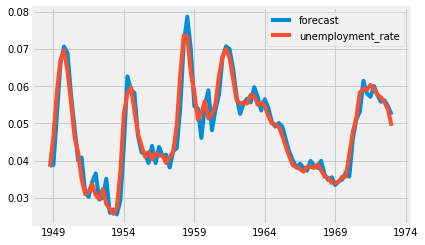

In [134]:
model.plot_predict(3, 100);

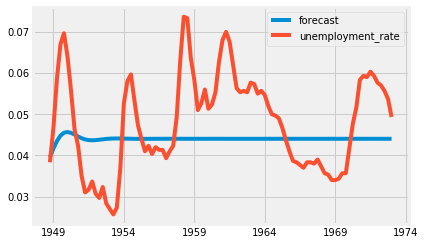

In [133]:
model.plot_predict(3, 100, dynamic=True);

In [135]:
# residuals 

# there are 4 plots that can inverstgeate (slack, lesson)
